***ABSTRACT:***The purpose of this notebook is to understand how to create and train a  simple Convolution Neural Network for classifying handwritten digits from the TMNIST dataset.

Approaches: The dataset is divided into Train data and Test data. This notebook tries to use a convolution neural network to do this image recognition.

Results: Trained the CNN to get an accuracy of 98.66%

# **IMPORTING LIBRARIES AND FUNCTION**


In [ ]:
import numpy as np
import pandas as pd
import os



**INSTALL KERAS**

In [ ]:
pip install keras

**IMPORTING TENSERFLOW KERAS**

In [ ]:
import tensorflow.keras as tk


**LOADING MNIST DATASET**

In [ ]:
mnist = tk.datasets.mnist

In [ ]:
data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step




---



**DIVIDING THE DATASET INTO TRAINING AND TEST SET**

In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

**Pre-Processing the Dataset:**
Data has to be processed, cleaned, rectified in order to improve its quality. CNN will learn best from a dataset that does not contain any null values, has all numeric data, and is scaled. So, here we will perform some steps to ensure that our dataset is perfectly suitable for a CNN model to learn from. From here onwards till we create CNN model, we will work only on the training dataset. 

If you write X_train[0] then you get the 0th image with values between 0-255 (0 means black and 255 means white). The output is a 2-dimensional matrix (Of course, we will not know what handwritten digit X_train[0] represents. To know this write y_train[0] and you will get 5 as output. This means that the 0th image of this training dataset represents the number 5. 

In [ ]:
# Convert to float32
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [ ]:
y_train[2]

4

**let’s scale this training and test datasets as shown below:**

In [ ]:
#normalizing the image data
X_train = X_train / 255
X_test = X_test / 255

**After scaling, we should convert the 2-d matrix to a 1-d array by using this:**

In [ ]:
X_train = X_train.reshape(-1,28,28,1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)   

**Displaying the images of every number row by row**

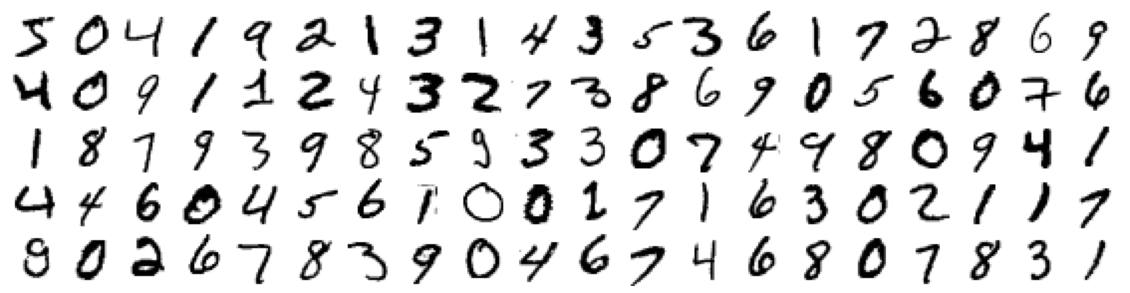

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def showDigits(instances, images_per_row=20):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(28,28) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((28, 28 * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(20,10))
example_images = X_train[:100]
showDigits(example_images)
plt.show()

**To see the images individually We just see the 25 the indexed image from the dataset and its corresponding label**

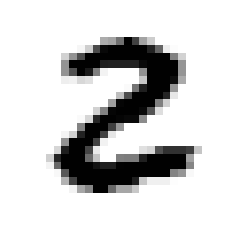

In [ ]:
# for ploting 
import matplotlib as mpl
import matplotlib.pyplot as plt
randDigit = X_train[25]
randDigitImage = randDigit.reshape(28,28)
plt.imshow(randDigitImage, cmap=mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
y_train[25]

2

**IMPORTING LIBRARIES AND FUNCTIONS FOR CONVOLUTION NEURAL NETWORK**

In [ ]:
# importing libraries for building neural netwrok
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, accuracy_score



**BUILDING THE CNN ARCHITECTURE**

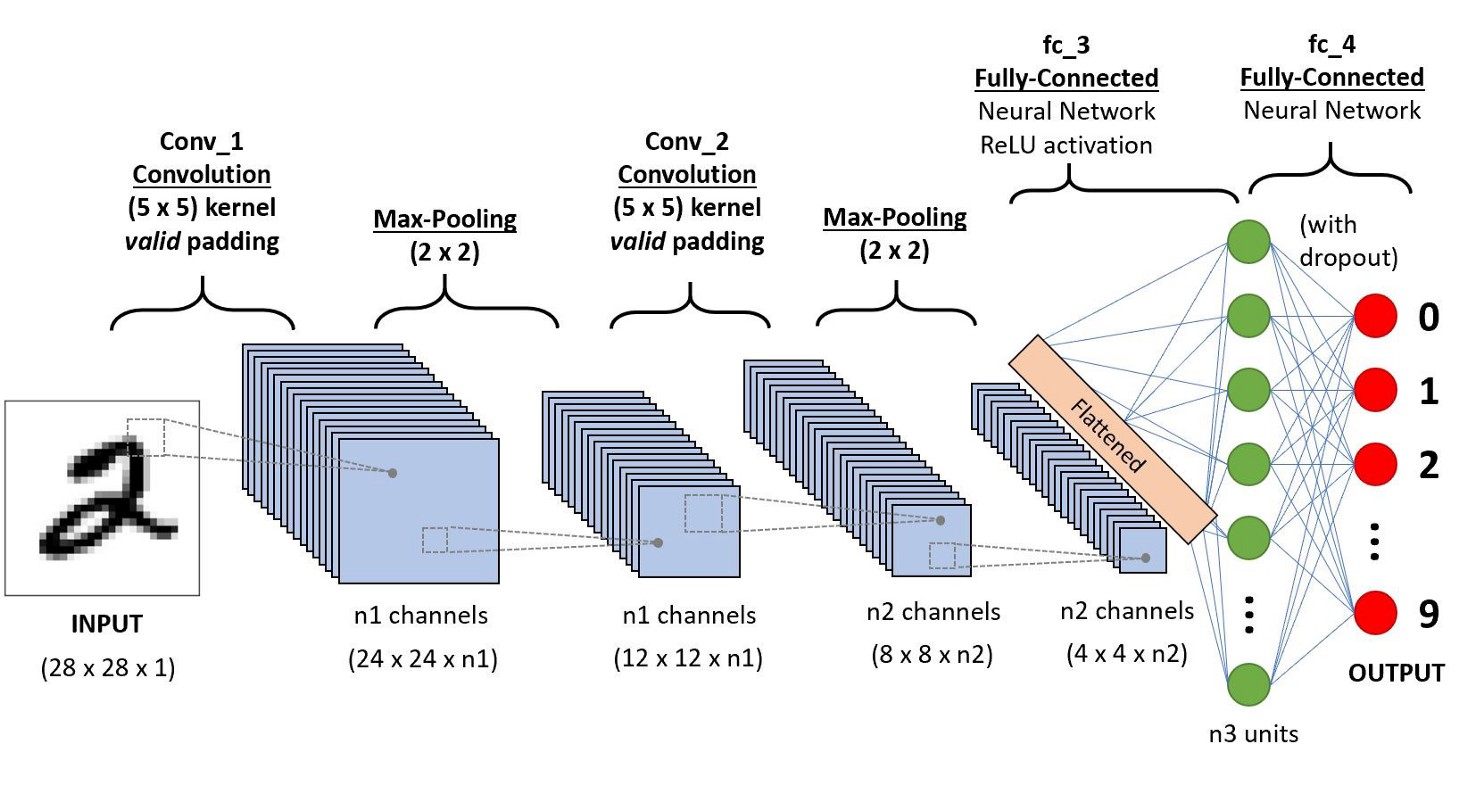

In [ ]:
convolutional_neural_network = models.Sequential([
    # Convolution layer 1 with 25 filters of 3*3 pixels. 
    # Since the image is 28x28 pixel, 3x3 should be a reasonable small and efficient fileter.
    #using the activation function relu of input size (28,28,1)
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    # using the max pooling to make the result after filter become smaller 
    layers.MaxPooling2D((2, 2)),

    #Convolution layer 2 with 64 filters of 3*3 pixels
    #using activation function relu
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # using the max pooling to make the result after filter become smaller 
    layers.MaxPooling2D((2, 2)),

    #Convolution layer 2 with 64 filters of 3*3 pixels
    #using activation function relu
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # using the max pooling to make the result after filter become smaller 
    layers.MaxPooling2D((2, 2)),
    #Flattening from 2D to 1D
    layers.Flatten(),
    #Fully connectedlayers with activation function relu
    layers.Dense(64, activation='relu'),
    #Fully connectedlayers with activation function softmax
    layers.Dense(10, activation='softmax')
])

In [ ]:
convolutional_neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

**In the CNN model created above**, there is an input layer followed by two hidden layers and finally an output layer. In the most simpler terms, activation functions are responsible for making decisions of whether or not to move forward. In a deep neural network like CNN, there are many neurons, and based on activation functions, neurons fire up and the network moves forward. If you do not understand much about activation functions use ‘relu’ as it is used most popularly.

Once the model has been created, it is time to compile it and fit the model. During the process of fitting, the model will go through the dataset and understand the relations. It will learn throughout the process as many times as has been defined. In our example, we have defined 10 epochs. During the process, the CNN model will learn and also make mistakes. For every mistake (i.e., wrong predictions) the model makes, there is a penalty and that is represented in the loss value for each epoch (see GIF below). In short, the model should generate as little loss and as high accuracy as possible at the end of the last epoch.

**Convolution**:

Kernel convolution is not only used in CNNs, but is also a key element of many other Computer Vision algorithms. It is a process where we take a small matrix of numbers (called kernel or filter), we pass it over our image and transform it based on the values from filter. Subsequent feature map values are calculated according to the following formula, where the input image is denoted by f and our kernel by h. The indexes of rows and columns of the result matrix are marked with m and n respectively.
             
                 G[m,n]=(f∗h)[m,n]=∑j∑kh[j,k]f[m−j,n−k]

**Pooling Layer** :- Pooling layer is used to gradually decrease the spatial extent of an image which helps in reduction of overall computational time with little to none loss of features. Types of Pooling Layers

**Max-Pooling Layer**:
Average-Pooling Layer
Weighted Average Pooling Layer etc. In our example we have used Max-Pooling layer, as it is the most widely used pooling layers. It reports the maximum output from a neighborhood, that is a pooling kernel matrix.

**Flatten and Dense layers :-** This layer converts a three dimentional layer into a one dimentional layer. Which makes it easy to use these feature maps for further classification. e.g.
10∗10∗2=200
 
Here a matrix of (10 10 2) matrix layer will become a linear layer with 200 neurons. The output of this layer is given to dense layers for classification.

 **Activation Functions** :- The activation functions used in CNN are the same as the ones which we use in Dense Neural Network.

**Compilation**: We select an optimizer-adam, aloss function and metrics for evaluation of model performance.

In [ ]:
#using hyperparameters for training by using optimizer adam
convolutional_neural_network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**TRAIN THE CNN WITH TRAINING DATA**

In [ ]:
# Train the CNN with training data using epoch 10
history = convolutional_neural_network.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.2266 - accuracy: 0.9307
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0748 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0552 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0438 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0245 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 55s 29m

**Testing the performance using test data**

In [ ]:
#testing the accuracy using test data
score = convolutional_neural_network.evaluate(X_test,y_test,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:98.66%


In [ ]:
# Function for Plotting the model performance
def Plot_performance (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

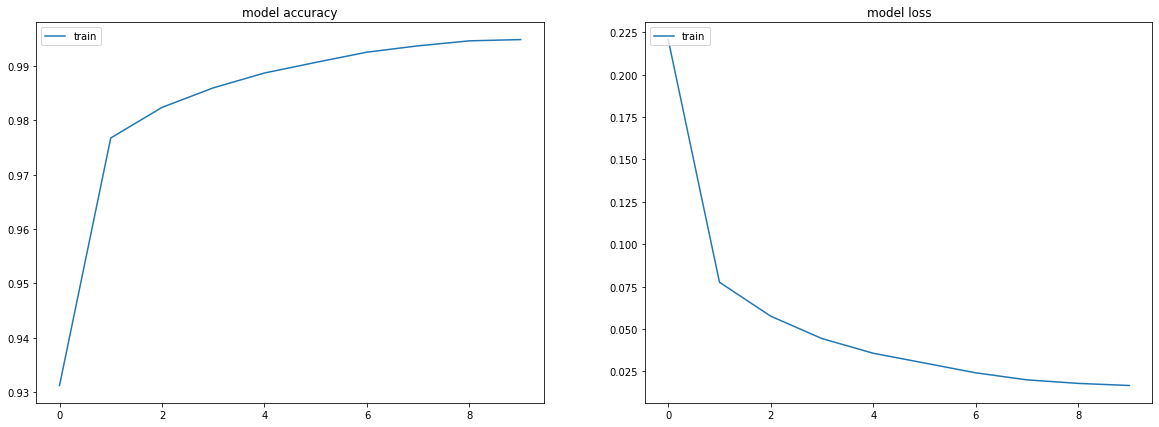

In [ ]:
Plot_performance(history)

**Predicting the image:** Model classify image as a 9, Although it is not a clear handwritting of the number 9, our model was able to classify it as 9.

---



The Image is predicted as 9


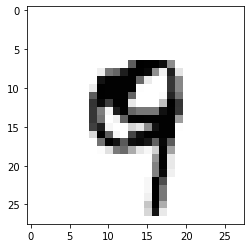

In [ ]:
# Predicting the test data
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = convolutional_neural_network.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('The Image is predicted as',pred.argmax())

**CONCLUSION**: We have successfully built a convolution neural network to classify handwritten digits. We have achieved the accuracy of over 98.66% for the test data.The model performed very good using simple cnn the training accuracy is almost 99%. Eventhough the handwritten image is not clear,our model was able to classify it as 9.

**References**:
1. Sckit learn official documentation
2. Towards Data Science 
3. StackOverflow

The algorithms were referred directly from the **Sckit learn official documentation, Python programming**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science**. Some other important python coding referred from StacksOverflow  The remaining code was written independently.



Copyright 2021 Subbiah Cheranthian


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.